In [2]:
###########################################################################################################################
#
# Antonio Vieira da Silva Neto - NUSP  5690149 - Doutorando em Ciências
# Henrique Lefundes da Silva   - NUSP 11808280 - Pesquisador de Iniciação Científica e Graduando em Engenharia Elétrica
#
# Escola Politécnica da Universidade de São Paulo
# Programa de Pós-Graduação em Engenharia Elétrica
# Departamento de Engenharia de Computação e Sistemas Digitais
# Área de Concentração: Confiabilidade e Segurança
#
# Tese de Doutorado: Safety ArtISt: Um Método para a Garantia de Segurança Crítica de Sistemas com Inteligência Artificial
#
# Estudo de Caso 4 - Sistema de Controle de Frenagem de Veículos
#
# Arquivo para geração do modelo base de IA
#
###########################################################################################################################

###########################################################################################################################
#
# Tabela de Controle de Versões do Código
#
#--------|-------------------|------------------------------|--------------------------------------------------------------
# Versão | Data (dd/mm/aaaa) | Autor                        | Descrição da Versão
#--------|-------------------|------------------------------|--------------------------------------------------------------
#   01   |    28/07/2022     | Henrique Lefundes da Silva   | Versão inicial.
#--------|-------------------|------------------------------|--------------------------------------------------------------
###########################################################################################################################

# Importação de Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report 
from stratify import StratifyData
from scipy.stats import mode

In [3]:
# Pré-processamento dos dados (pre_processing)

def pre_processing(address):
    dataColumns = ["Distância Ruidosa", "Velocidade Ruidosa", "Capacidade de Frenagem Ruidosa",
                    "Decisão"]
    
    dataset = pd.read_csv(address, header = None, names = dataColumns)
    
    return dataset

<h1>random_forest</h1>

In [4]:
# Realiza a leitura do arquivo CSV
# O arquivo se encontra numa pasta dentro do diretório deste programa:
# ./Árvore de Decisão/Dataset/Dataset.csv
pp_dataset = pre_processing("DatasetT&V.csv")
print(pp_dataset)

       Distância Ruidosa  Velocidade Ruidosa  Capacidade de Frenagem Ruidosa  \
0               0.000000            0.000000                          1.3950   
1               0.000000            0.000000                          1.1625   
2               1.579846            0.000000                          0.9300   
3               0.282185            0.000000                          0.7800   
4               0.394876            0.000000                          0.6500   
...                  ...                 ...                             ...   
57280        2000.433820           26.977928                          1.3950   
57281        1999.988138           28.886308                          1.1625   
57282        1998.246886           28.409583                          0.9300   
57283        2002.044078           27.358991                          0.7800   
57284        1998.055064           27.991858                          0.6500   

       Decisão  
0          1.0  
1    

In [5]:
#Define as entradas e as saídas do dataset
pp_data_inputs = pp_dataset.drop(columns = ['Decisão'])
print(pp_data_inputs)

pp_data_outputs = pp_dataset[['Decisão']]
print(pp_data_outputs)


       Distância Ruidosa  Velocidade Ruidosa  Capacidade de Frenagem Ruidosa
0               0.000000            0.000000                          1.3950
1               0.000000            0.000000                          1.1625
2               1.579846            0.000000                          0.9300
3               0.282185            0.000000                          0.7800
4               0.394876            0.000000                          0.6500
...                  ...                 ...                             ...
57280        2000.433820           26.977928                          1.3950
57281        1999.988138           28.886308                          1.1625
57282        1998.246886           28.409583                          0.9300
57283        2002.044078           27.358991                          0.7800
57284        1998.055064           27.991858                          0.6500

[57285 rows x 3 columns]
       Decisão
0          1.0
1          1.0
2    

In [6]:
random_state = 1

# Definição dos hiperparâmetros

#n_estimators = [int(x) for x in np.arange(2, 11, step = 1)]

n_estimators = [int(x) for x in np.arange(3, 4, step = 1)]

criterion = ['entropy', 'gini']

max_depth = [int(x) for x in np.arange(1, 9, step = 1)] # max_depth já limitado

min_samples_split = [int(x) for x in np.arange(2, 18, step = 3)]

min_samples_leaf = [int(x) for x in np.arange(1, 18, step = 3)]

min_weight_fraction_leaf = [float(x) for x in np.linspace(0,0.5,5)]

max_leaf_nodes = [int(x) for x in np.arange(200, 510, step = 10)]
max_leaf_nodes.append(None)

max_features = [int(x) for x in np.arange(1, 4, step = 1)] 
max_features.append('log2')
max_features.append('sqrt')
max_features.append(None)

bootstrap = [False, True]

hyperparameters_settings = {'criterion'                : criterion,
                            'max_depth'                : max_depth,
                            'min_samples_split'        : min_samples_split,
                            'min_samples_leaf'         : min_samples_leaf,
                            'min_weight_fraction_leaf' : min_weight_fraction_leaf,
                            'max_leaf_nodes'           : max_leaf_nodes,
                            'max_features'             : max_features,
                            'bootstrap'                : bootstrap,
                            'n_estimators'             : n_estimators
                           }

print(hyperparameters_settings)

# Metrica de performance
scoring = 'recall'

# Número de partições
k_fold = 10 
n_iter = 2500

print('Tempo estimado de processamento:', round((n_iter*10)/140,1), 'segundos')


{'criterion': ['entropy', 'gini'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8], 'min_samples_split': [2, 5, 8, 11, 14, 17], 'min_samples_leaf': [1, 4, 7, 10, 13, 16], 'min_weight_fraction_leaf': [0.0, 0.125, 0.25, 0.375, 0.5], 'max_leaf_nodes': [200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, None], 'max_features': [1, 2, 3, 'log2', 'sqrt', None], 'bootstrap': [False, True], 'n_estimators': [3]}
Tempo estimado de processamento: 178.6 segundos


In [7]:
# Criação da árvore de decisão
starting_random_forest= RandomForestClassifier()

# Optimização dos hiperparâmetros com RandomSearch
rfTries = RandomizedSearchCV(estimator = starting_random_forest, param_distributions = hyperparameters_settings, scoring = scoring,
                            cv = KFold(n_splits = k_fold, shuffle = True), verbose = 3, n_jobs = -1, n_iter = n_iter)

# Teste com os hiperparâmetros encontrados
rfTries.fit(pp_data_inputs, pp_data_outputs)


Fitting 10 folds for each of 2500 candidates, totalling 25000 fits


c:\Users\R2D2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
                   estimator=RandomForestClassifier(), n_iter=2500, n_jobs=-1,
                   param_distributions={'bootstrap': [False, True],
                                        'criterion': ['entropy', 'gini'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                                        'max_features': [1, 2, 3, 'log2',
                                                         'sqrt', None],
                                        'max_leaf_nodes': [200, 210, 220, 230,
                                                           240, 250, 260, 270,
                                                           280, 290, 300, 310,
                                                           320, 330, 340, 350,
                                                           360, 370, 380, 390,
                                                           400, 410, 420, 430,
                                                           440, 450, 460, 470,
                                                           480, 490, ...],
                                        'min_samples_leaf': [1, 4, 7, 10, 13,
                                                             16],
                                        'min_samples_split': [2, 5, 8, 11, 14,
                                                              17],
                                        'min_weight_fraction_leaf': [0.0, 0.125,
                                                                     0.25,
                                                                     0.375,
                                                                     0.5],
                                        'n_estimators': [3]},
                   scoring='recall', verbose=3)

In [18]:
# Imprime valores ótimos dos hiperparâmetros
print(rfTries.best_params_)
print(k_fold,'- Fold Best recall-score: ', rfTries.best_score_*100)

{'n_estimators': 3, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_leaf_nodes': 380, 'max_features': 2, 'max_depth': 8, 'criterion': 'entropy', 'bootstrap': True}
10 - Fold Best recall-score:  96.19867221868219


C:\Users\R2D2\AppData\Local\Temp\ipykernel_420\3539441362.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  final_random_forest.fit(inputsTrain, outputsTrain)


Accuracy: 99.04861656629134
Precision: 94.98657117278424
Recall: 95.2423698384201
F1-Score: 95.11429852084265
[[10287    56]
 [   53  1061]]


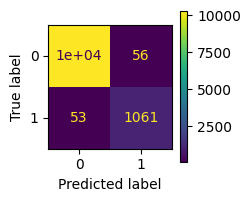

In [14]:
# Árvore de decisão final
final_random_forest = rfTries.best_estimator_

# final_decision_tree_1 = RandomForestClassifier(criterion = 'entropy', 
#                                             max_depth = 16,
#                                             n_estimators = 6,
#                                             max_features = 3, 
#                                             max_leaf_nodes = 270, 
#                                             min_samples_leaf = 3, 
#                                             min_samples_split = 6,
#                                             min_weight_fraction_leaf = 0, 
#                                             bootstrap = 'True')

# Holdout test
inputsTrain, inputsTest, outputsTrain, outputsTest = train_test_split(pp_data_inputs, 
                                                                      pp_data_outputs,
                                                                      test_size = 0.2)

final_random_forest.fit(inputsTrain, outputsTrain)

# Valores preditos pela árvore treinada
predicted_apply_brakes = final_random_forest.predict(inputsTest)

# Métricas de performance
finalAccuracy = accuracy_score(outputsTest, predicted_apply_brakes)
finalPrecision = precision_score(outputsTest, predicted_apply_brakes)
finalRecall = recall_score(outputsTest, predicted_apply_brakes)
finalF1 = f1_score(outputsTest, predicted_apply_brakes)
finalConfusionMatrix = confusion_matrix(outputsTest, predicted_apply_brakes)
finalClassificationReport = classification_report(outputsTest, predicted_apply_brakes)

plt.rcParams['figure.figsize'] = [2, 2]
plt.rcParams['figure.dpi'] = 100
# Plot da árvore de decisão treinada, comentado para diminuir tempo de execução
# plot_tree(final_decision_tree)
# plt.show()

# Imprime resultados finais
print('Accuracy:', finalAccuracy*100)
print('Precision:', finalPrecision*100)
print('Recall:', finalRecall*100)
print('F1-Score:', finalF1*100)
print(finalConfusionMatrix)
ConfusionMatrixDisplay(finalConfusionMatrix).plot()
plt.show()

******** Resultados DatasetT2 ********
Accuracy: 99.18128654970761
Precision: 96.14781244552903
Recall: 95.69743233865371
F1-Score: 95.92209373097991
[[51300   221]
 [  248  5516]]


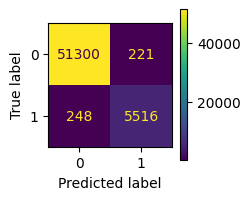

In [15]:

pp_dataset_test = pre_processing(f"DatasetT2.csv")

# Define entradas e saída
pp_data_inputs_test = pp_dataset_test.drop(columns = ['Decisão'])
pp_data_outputs_test = pp_dataset_test[['Decisão']]

# Valores preditos pela árvore treinada
predicted_apply_brakes = final_random_forest.predict(pp_data_inputs_test)

# Métricas de performance
finalAccuracy = accuracy_score(pp_data_outputs_test, predicted_apply_brakes)
finalPrecision = precision_score(pp_data_outputs_test, predicted_apply_brakes)
finalRecall = recall_score(pp_data_outputs_test, predicted_apply_brakes)
finalF1 = f1_score(pp_data_outputs_test, predicted_apply_brakes)
finalConfusionMatrix = confusion_matrix(pp_data_outputs_test, predicted_apply_brakes)
finalClassificationReport = classification_report(pp_data_outputs_test, predicted_apply_brakes)

# Imprime resultados finais
print(f'******** Resultados DatasetT2 ********')
print('Accuracy:', finalAccuracy*100)
print('Precision:', finalPrecision*100)
print('Recall:', finalRecall*100)
print('F1-Score:', finalF1*100)
print(finalConfusionMatrix)
ConfusionMatrixDisplay(finalConfusionMatrix).plot()
plt.show()

In [16]:
# Teste para dataset sem ruído 
dataColumns = ['Distancia Ruidosa', 'Velocidade Ruidosa', 'Capacidade de Frenagem Ruidosa', 'Distancia', 'Velocidade', 
                'Capacidade de Frenagem', 'Decisão', 'Aceleracao', 'AW', 'AG', 'VH', 'VC', 'V50', 'DS', 'Decisao Ruidosa', 
                'Aceleracao Ruidosa', 'AW Ruidosa', 'AG Ruidosa', 'VH Ruidosa', 'VC Ruidosa', 'V50 Ruidosa', 'DS Ruidosa']
    
pp_dataset_test = pd.read_csv("DatasetT&VDebug.csv", header = None, names = dataColumns)

pp_data_inputs_test = pp_dataset_test[['Distancia', 'Velocidade', 'Capacidade de Frenagem']]
pp_data_inputs_test = pp_data_inputs_test.rename(columns={"Distancia":"Distância Ruidosa","Velocidade":"Velocidade Ruidosa", "Capacidade de Frenagem":"Capacidade de Frenagem Ruidosa"})

print(pp_data_inputs_test)

pp_data_outputs_test = pp_dataset_test[['Decisão']]

print(pp_data_outputs_test)



       Distância Ruidosa  Velocidade Ruidosa  Capacidade de Frenagem Ruidosa
0                    0.0                 0.0                          1.3950
1                    0.0                 0.0                          1.1625
2                    0.0                 0.0                          0.9300
3                    0.0                 0.0                          0.7800
4                    0.0                 0.0                          0.6500
...                  ...                 ...                             ...
57280             2000.0                28.0                          1.3950
57281             2000.0                28.0                          1.1625
57282             2000.0                28.0                          0.9300
57283             2000.0                28.0                          0.7800
57284             2000.0                28.0                          0.6500

[57285 rows x 3 columns]
       Decisão
0          1.0
1          1.0
2    

******** Resultados dataset sem ruido ********
Accuracy: 99.3401413982718
Precision: 96.80222453945082
Recall: 96.63428174878557
F1-Score: 96.71818023962493
[[51337   184]
 [  194  5570]]


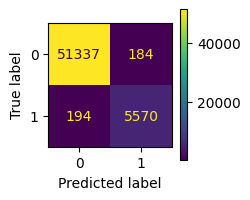

In [17]:
# Valores preditos pela árvore treinada
predicted_apply_brakes = final_random_forest.predict(pp_data_inputs_test)

# Métricas de performance
finalAccuracy = accuracy_score(pp_data_outputs_test, predicted_apply_brakes)
finalPrecision = precision_score(pp_data_outputs_test, predicted_apply_brakes)
finalRecall = recall_score(pp_data_outputs_test, predicted_apply_brakes)
finalF1 = f1_score(pp_data_outputs_test, predicted_apply_brakes)
finalConfusionMatrix = confusion_matrix(pp_data_outputs_test, predicted_apply_brakes)
finalClassificationReport = classification_report(pp_data_outputs_test, predicted_apply_brakes)

# Imprime resultados finais
print(f'******** Resultados dataset sem ruido ********')
print('Accuracy:', finalAccuracy*100)
print('Precision:', finalPrecision*100)
print('Recall:', finalRecall*100)
print('F1-Score:', finalF1*100)
print(finalConfusionMatrix)
ConfusionMatrixDisplay(finalConfusionMatrix).plot()
plt.show()  